Tensorflow_학습과정_4 

* CNN CIFAR 10 Example

CIFAR 10 - airplane, automobile, bird 등 10 개 정답으로 분류된, 아주 작은 컬러 이미지 데이터(shape = 32* 32* 3),

딥러닝 학습을 위한 50000 개의 학습 데이터, 10000 개의 테스트 데이터 제공

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.layers import Flatten, Dense, Dropout

(xtr, ytr), (xt, yt) = cifar10.load_data()
#cifar10 데이터 import

xtr = xtr.reshape(-1, 32, 32, 3)
xt = xt.reshape(-1, 32, 32, 3)
#tensor 로 변환(높이, 너비, 채널)

print(xtr.shape, xt.shape)
print(ytr.shape, yt.shape)

xtr = xtr.astype(np.float32)/ 255.0
xt = xt.astype(np.float32)/ 255.0
#x_train, x_test 데이터 normalization(max = 255.0)

170508288/170498071 [==============================] - 248s 1us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)
(50000, 1) (10000, 1)


In [7]:
#CNN 모델링

cnn = Sequential()

cnn.add(Conv2D(input_shape = (32,32,3), kernel_size = (3,3), filters = 32, activation = 'relu'))
cnn.add(Conv2D(kernel_size = (3,3), filters = 64, activation = 'relu'))
cnn.add(MaxPool2D(pool_size = (2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
#3차원 tensor 를 1차원 vector 로 변환

cnn.add(Dense(128, activation = 'relu'))
#은닉층
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation = 'softmax'))
#출력층

In [ ]:
#모델 컴파일 및 학습

cnn.compile(loss = 'sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(),\
           metrics = ['accuracy'])

hist= cnn.fit(xtr, ytr, batch_size = 128, epochs = 30, validation_data = (xt, yt))

CNN 모델 성능 향상을 위한 요소(for 정확도 향상, 오버피팅 감소)

- 더 많은 층(layer) 쌓기 : conv layer 가 중첩된 더 깊은 구조일수록, 모델 성능이 크게 개선됨.

- 이미지 데이터 보강(image data augmentation)

- 높은 해상도 데이터 확보

- L1, L2 등 가중치 규제, Dropout, 배치 정규화 등

---------------------------------------------------------------------------------------------------

* Image Data Aumentation(이미지 데이터 보강)

- 원본 이미지를 상하좌우 방향으로 조금 이동하거나, 약간 회전/ tilt, 확대 등 여러가지 변환을 조합해 데이터 갯수를 증가시키는 작업

- 다양한 데이터를 입력, 모델을 더욱 견고하게 만들어주고 높은 성능을 기대할 수 있음.

- 수집된 데이터가 적은 경우, 강력한 힘을 발휘

flow() 함수 예제 - 

In [9]:
#ImageDataGenerator 생성

import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.3, shear_range = 0.4,\
                        horizontal_flip = True)
#해당 함수를 사용해 원본 이미지에 대해 30도 이내에서 회전, 가로 방향 30% 범위에서 이동, 기울임은 40% 범위에서 이동, 좌우반전 가능한 변화를 줌

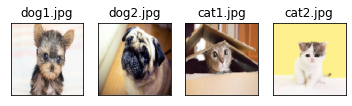

In [11]:
#이미지 로드 및 정규화

#이미지 데이터 출처 :  https://github.com/neowizard2018/neowizard/tree/master/TensorFlow2
img_array_list = []
imgs = ['dog1.jpg', 'dog2.jpg', 'cat1.jpg', 'cat2.jpg']

for i in range(len(imgs)):
    
    loaded_img = load_img(imgs[i], target_size = (100, 100))
    #JpegImageFile 타임 리턴
    img_arr = img_to_array(loaded_img) / 255.0
    #numpy 타입으로 변환
    
    img_array_list.append(img_arr)
    
plt.figure(figsize = (6,6))
for i in range(len(img_array_list)):
    plt.subplot(1, len(img_array_list), i+1)
    plt.xticks([]);plt.yticks([])
    plt.title(imgs[i])
    plt.imshow(img_array_list[i])

In [12]:
#flow() 함수 적용

data_gen = gen.flow(np.array(img_array_list), batch_size = 2)

flow() 입력데이터 - (원본 데이터 전체 갯수, 높이, 너비, 채널) 형상을 갖는 4차원 tensor 로 주어저야 함.

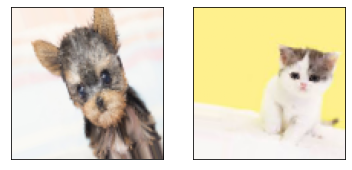

In [13]:
#next(), 변형 이미지 출력

img = data_gen.next()
#batch size 지정 갯수 만큼 랜덤 이미지 생성

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

*지정된 batch_size 갯수만큼 원본 이미지 데이터의 변형을 확인할 수 있었습니다.

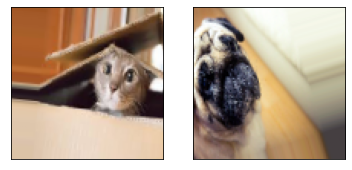

In [14]:
img = data_gen.next()
#batch size 지정 갯수 만큼 랜덤 이미지 생성

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

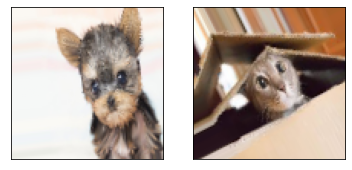

In [15]:
img = data_gen.next()
#batch size 지정 갯수 만큼 랜덤 이미지 생성

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    plt.imshow(img[i])

flow_from_directory() Example - 

In [18]:
gen = ImageDataGenerator(rotation_range = 30, width_shift_range = 0.3, shear_range = 0.3,\
                        rescale = 1./255)
#해당 함수를 사용해 원본 이미지에 대해 30도 이내에서 회전, 가로 방향 30% 범위에서 이동, 기울임은 30% 범위에서 이동,
#최댓값 255로 나누어 0~1 사이 값으로 정규화

In [20]:
data_path = 'test_dir'

data_gen = gen.flow_from_directory(directory = data_path, batch_size = 3,\
                                  shuffle = True, target_size = (100, 100),\
                                  class_mode = 'categorical')
#주어진 디렉토리의 하위 디렉토리 이름에 맞춰 자동으로 labeling.
#class_mode : binary - 0 or 1, categorical - 원핫 인코딩 형태, sparse - 10진수 형태 

Found 12 images belonging to 3 classes.


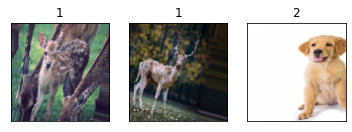

In [25]:
img, label = data_gen.next()
#batch size 지정 갯수 만큼 랜덤 이미지 생성

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))
    #categorical 형태로 설정 -> 정답(label) 이 원핫 인코딩 방식으로 나타남 -> 십진수 표시 위해 np.argmax 이용
    #고양이 0, 사슴 1, 강아지 2
    
    plt.imshow(img[i])

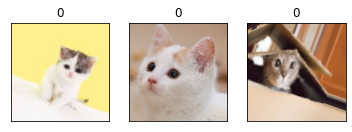

In [26]:
img, label = data_gen.next()

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))
    
    plt.imshow(img[i])

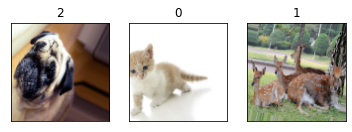

In [27]:
img, label = data_gen.next()

plt.figure(figsize = (6,6))
for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.xticks([]); plt.yticks([])
    
    plt.title(str(np.argmax(label[i])))
    
    plt.imshow(img[i])